Pour exécuter ce programme, il est nécessaire de connecter une carte Arduino reliée au capteur adéquat, et contenant le programme hcsr04.ino  
Pour les branchements :  
 VCC sur Arduino 5v   
 GND sur Arduino GND  
 Echo sur Arduino broche 7  
 Trig sur Arduino broche 8

On commence par importer les bibliothèques nécessaires. Attention : NE PAS EFFACER !

In [1]:
from pylab import *    # charge toutes les bibliothèques scientifiques
import serial
import time

# Spécifiez le port série et la vitesse de communication (bauds)
port = '/dev/ttyACM0'  # Remplacez par le port approprié (ex. '/dev/ttyUSB0' sur Linux)
baudrate = 9600  # Assurez-vous que la vitesse correspond à celle configurée sur la carte Arduino

# Ouvrir la connexion série
ser = serial.Serial(port, baudrate)

# Attendre un court instant pour permettre la connexion
time.sleep(2)

valeurs_moyennes = []
incertitudes_types = []
variable = []

# Paramètres de graphique
%matplotlib inline
rcParams['figure.figsize'] = [32, 16]    # pour une fenetre graphique adaptée
rcParams['font.size'] = 15    # pour un texte plus grand
rcParams['lines.markersize'] = 15    # pour des symboles plus grands
rcParams['lines.markeredgewidth'] = 2    # pour des symboles plus larges

Acquisition des valeurs.  
Entrer une nouvelle valeur de la variable pour réaliser une nouvelle mesure. Pour arrêter, valider sans entrer de valeur.

In [2]:
while True :
    entree = input("Entrer la valeur de la distance en cm :")
    try :
        variable.append(float(entree))
        ser.flushInput()  # Vider le tampon de réception
        
        # Envoyer la commande de reset
        ser.setDTR(False)  # DTR (Data Terminal Ready) à l'état bas pendant un court instant
        time.sleep(0.1)
        ser.setDTR(True)  # DTR à l'état haut pour terminer le reset
        time.sleep(2)    # on laisse le temps à Arduino d'être prêt
        # Liste pour stocker les données
        liste_donnees = []
        delai = 1    # délai maximum d'attente de valeur sur le port série
        lecture = time.time()
        
        while True :
                # Lire une ligne de données depuis le port série
            if ser.in_waiting > 0:
                ligne = ser.readline().decode().strip()
                lecture = time.time()
                # Convertir la ligne en nombre (assumant que les données sont des nombres)
                valeur = float(ligne)
                
                # Ajouter les données à la liste
                liste_donnees.append(valeur)
            elif time.time() > lecture + delai :
                donnees = array(liste_donnees) / 2    # Le temps de trajet se fait sur un aller-retour.
                # Calculs statistiques (moyenne, écart-type et incertitude-type) sur une série de mesures x :
                moy = mean(donnees)
                ecartType = std(donnees, ddof=1)  # ddof=1 permet de calculer l'écart-type expérimental Sn-1
                incertitudeType = ecartType / sqrt(len(donnees))
                valeurs_moyennes.append(moy)
                incertitudes_types.append(incertitudeType)
                break
    except :
        variable = array(variable)    # on transforme la liste de valeurs en tableau exploitable
        break    # on sort de la boucle de mesures

Entrer la valeur de la distance en cm : 10
Entrer la valeur de la distance en cm : 15
Entrer la valeur de la distance en cm : 20
Entrer la valeur de la distance en cm : 25
Entrer la valeur de la distance en cm : 30
Entrer la valeur de la distance en cm : 


In [3]:
print(f"Dernières valeurs de temps mesurées en µs : {donnees}")

valeurs mesurées : [755.5 756.5 755.5 755.  755.5 755.  756.5 757.  756.5 757.  755.  755.
 755.  755.  755.  755.  755.  757.  756.5 756.5 756.5 755.5 756.  755.
 755.5 755.5 755.5 755.5 755.  757.  756.5 756.5 756.5 755.  756.  755.5
 755.  755.5 755.  755.  755.  757.  757.  757.  757.  755.  756.5 755.5
 755.5 755.  755.5 755.5 756.5 756.5 756.5 757.  755.  755.5 757.  755.
 755.  755.5 755.5 755.  757.  757.  756.5 757.  755.  755.  755.5 755.5
 755.5 755.  755.5 755.  757.  757.  757.  757.  755.5 755.5 755.5 755.5
 755.  755.5 755.5 757.  757.  757.  757.  755.5 757.  755.5 756.  755.5
 755.5 755.5 755.5 757. ]


Affichage des valeurs statistiques :

In [4]:
resultat = f"moyenne du temps de trajet : {moy:.5} µs ; incertitude-type : {incertitudeType:.2} µs"    # crée une ligne de texte résumant les résultats
print(resultat)    # affiche le résultat

moyenne : 755.87 ; incertitude-type : 0.078


On trace l'histogramme pour la dernière série de valeurs de temps mesurée :

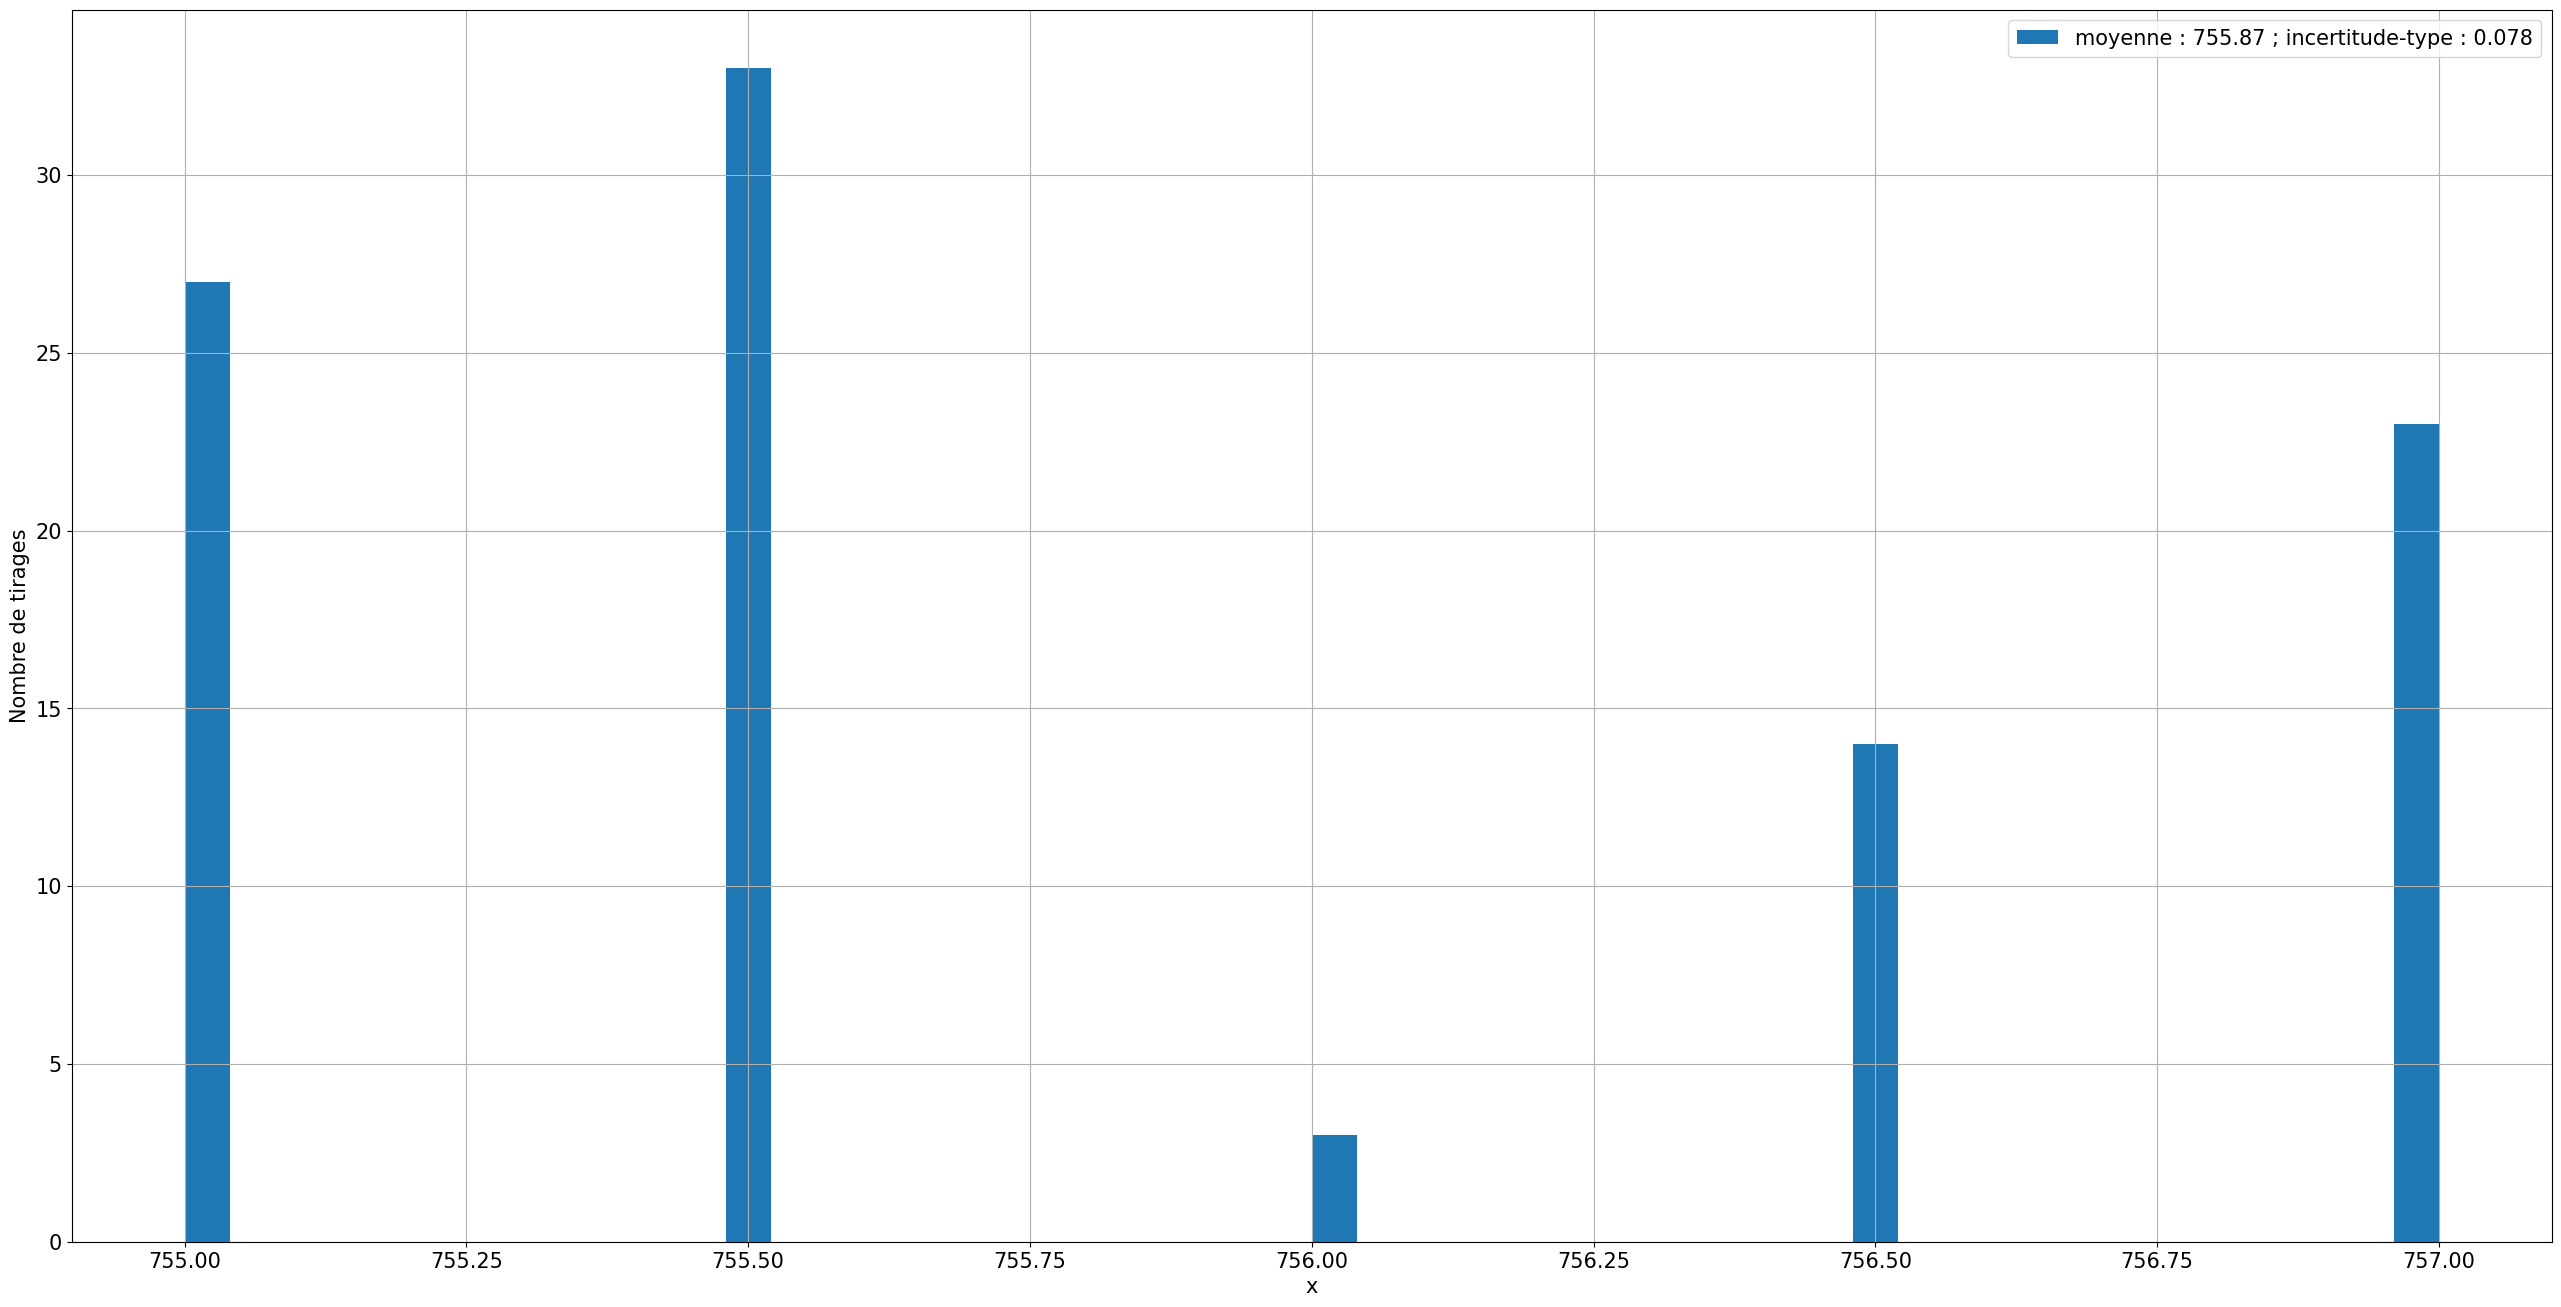

In [5]:
subplot(1, 1, 1)    # lignes, colonnes, numéro du graphique

hist(donnees, bins=50, label=resultat)    # trace un histogramme à partir d'une série de mesures x ; options possibles : range=(,) et bins=nombre ou liste.

grid()    # ajoute une grille
legend()    # ajoute la légende au graphique
title("")    # mettre le titre désiré entre les guillemets
xlabel("x")    # mettre le nom de l'axe des abscisses entre les guillemets
ylabel("Nombre de tirages");    # mettre le nom de l'axe des ordonnées entre les guillemets. Le point-virgule final évite d'afficher un texte récapitulatif.

On définit les valeurs mesurées dans des tableaux, ainsi que leurs incertitudes types :

In [6]:
d = variable * 1e-2    # valeurs des distances en m
ud = 3e-3
t = array(valeurs_moyennes) * 1E-6    # valeurs des temps de trajet en s
ut = array(incertitudes_types) * 1E-6

Visualisation du graphique pour s'assurer de la cohérence des mesures :

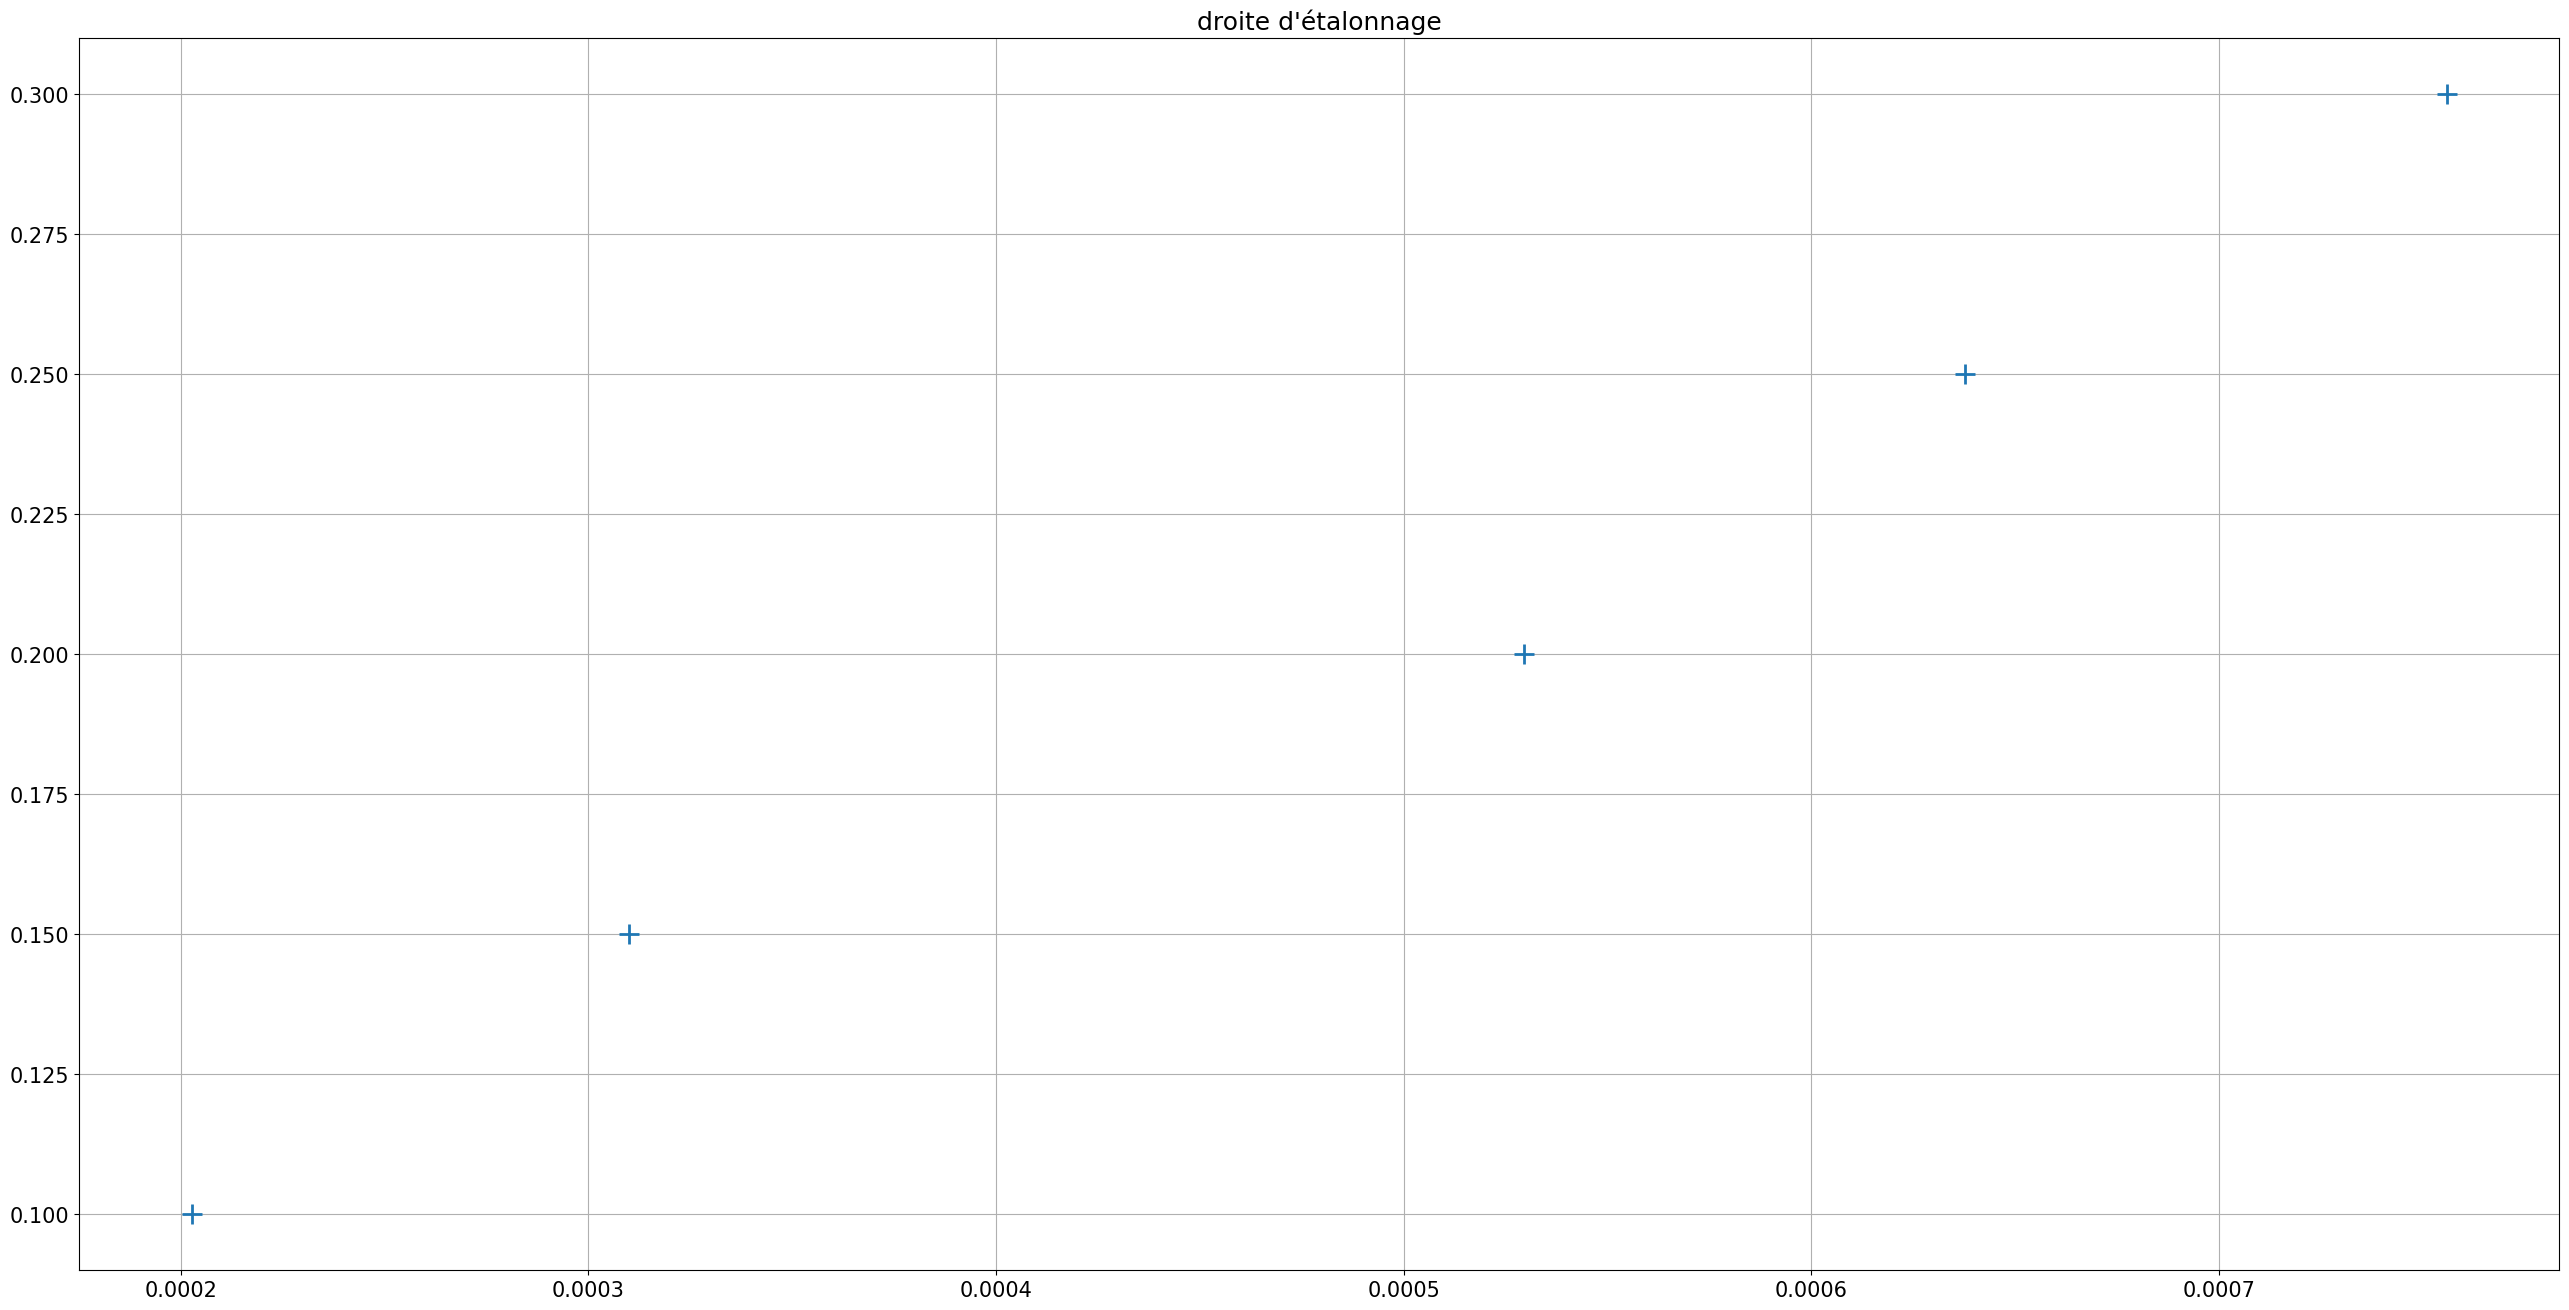

In [7]:
subplot(1, 1, 1)    # lignes, colonnes, numéro du graphique

plot(t, d, '+')    # abscisse, ordonnée, options : + o . , s points   - -- -. : lignes  b g r y m c k w couleurs

grid()    # ajoute une grille
title(r"droite d'étalonnage")    # mettre le titre désiré entre les guillemets
xlabel("")    # mettre le nom de l'axe des abscisses entre les guillemets
ylabel("");    # mettre le nom de l'axe des ordonnées entre les guillemets. Le point-virgule final évite d'afficher un texte récapitulatif.

Tirages aléatoires de valeurs selon la méthode Monte Carlo et calcul pour chaque tirage du coefficient directeur et de l'ordonnée à l'origine pour un modèle de type $y=ax+b$ :

In [8]:
a = []    # liste vide pour les coefficients direxteurs
b = []    # liste vide pour les ordonnées à l'origine

tirages = 100000    # nombre de simulations

for _ in range(tirages):
    talea = normal(t,ut)    # tirage aléatoire selon une loi normale
    dalea = normal(d,ud)
    
    # Insérer ici si nécessaire les formules permettant les calculs des grandeurs en abscisse et en ordonnée :
    
    
    p = polyfit(talea ,dalea ,1)    # calcul des coefficients du modèle
    a.append(p[0])
    b.append(p[1])

Calcul et affichage des valeurs moyennes et incertitudes-types pour le coefficient directeur et l'ordonnée à l'origine :

In [9]:
amoy = mean(a)
bmoy = mean(b)
ua = std(a, ddof=1)
ub = std(b, ddof=1)

resultat = f"coefficient directeur : {amoy:.5} incertitude : {ua:.2} ; ordonnée à l'origine : {bmoy:.5} incertitude : {ub:.2}"
print(resultat)

coefficient directeur : 343.1 incertitude : 6.6 ; ordonnée à l'origine : 0.032837 incertitude : 0.0035


Mesure de distance :  
Il faut uniquement exécuter ce bloc pour chaque nouvelle distance à mesurer

In [33]:
try :
    ser.flushInput()  # Vider le tampon de réception
        
    # Envoyer la commande de reset
    ser.setDTR(False)  # DTR (Data Terminal Ready) à l'état bas pendant un court instant
    time.sleep(0.1)
    ser.setDTR(True)  # DTR à l'état haut pour terminer le reset
    time.sleep(2)    # on laisse le temps à Arduino d'être prêt
    # Liste pour stocker les données
    liste_temps = []
    lecture = time.time()
        
    while True :
            # Lire une ligne de données depuis le port série
        if ser.in_waiting > 0:
            ligne = ser.readline().decode().strip()
            lecture = time.time()
            # Convertir la ligne en nombre (assumant que les données sont des nombres)
            valeur = float(ligne)
                
            # Ajouter les données à la liste
            liste_temps.append(valeur)
        elif time.time() > lecture + delai :
            temps = array(liste_temps) / 2    # Le temps de trajet se fait sur un aller-retour.
            # Calculs statistiques (moyenne, écart-type et incertitude-type) sur une série de mesures x :
            tmoy = mean(temps)
            ecartType = std(temps, ddof=1)  # ddof=1 permet de calculer l'écart-type expérimental Sn-1
            ut = ecartType / sqrt(len(temps))
            break
except :
    pass

print(f"Durée d'un aller simple : {tmoy} µs")
tmesalea = normal(tmoy, ut, tirages) * 1e-6
dmesalea = tmesalea * array(a) + array(b)
dmesmoy = mean(dmesalea)
udmes = std(dmesalea, ddof=1)

resultat = f"distance : {dmesmoy:.5} m ; incertitude-type : {udmes:.2} m"
print(resultat)

Durée d'un aller simple : 676.305 µs
distance : 0.26488 m ; incertitude-type : 0.0018 m
